In [364]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [365]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [366]:
df = pd.read_csv('Student_Performance (1).csv')

In [367]:
n=df.shape[0]  # number of rows
m=df.shape[1]  # number of columns

In [368]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [369]:
df=df.drop('Extracurricular Activities', axis=1)

In [370]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Sleep Hours                       10000 non-null  int64  
 3   Sample Question Papers Practiced  10000 non-null  int64  
 4   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 390.8 KB


Assinging x and y value

In [372]:
X = df.drop('Performance Index', axis=1)  # dropping dependent value
y = df['Performance Index']

training and testing

In [373]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.8,random_state=42)

training the model

In [374]:
model = LinearRegression()

In [375]:
model.fit(xtrain,ytrain)  #model is learning from train data

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [376]:
model.intercept_ # when base is o for 4 columns of x -33.60

np.float64(-33.60206732749268)

In [377]:
model.coef_ # for each unit for all the 4 columns these values increase

array([2.85289351, 1.01703572, 0.47331832, 0.19172629])

In [378]:
xtest.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
6252,5,69,8,2
4684,2,46,4,8
1731,7,56,7,5
4742,6,42,8,5
4521,7,53,4,6


In [379]:
ytest.head()

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
Name: Performance Index, dtype: float64

In [380]:
target_mean=ytest.mean()
target_mean

np.float64(54.878)

In [381]:
#predicting the model
predicted_values=model.predict(xtest)
predicted_values

array([55.00786377, 22.31444624, 47.59404705, ..., 16.48182916,
       63.64243731, 46.23799491], shape=(2000,))

In [382]:
predicted_values1=model.predict(xtrain)
predicted_values1

array([34.76901001, 25.38502005, 58.18029349, ..., 45.35527464,
       21.31136972, 22.8776303 ], shape=(8000,))

In [383]:
predicted_values.mean()

np.float64(54.95746814221592)

In [384]:
errors = ytest - predicted_values
errors

6252   -4.007864
4684   -2.314446
1731   -1.594047
4742   -2.975972
4521   -2.314711
          ...   
6412   -2.184627
8285    3.009628
7853   -0.481829
1095    1.357563
6929    0.762005
Name: Performance Index, Length: 2000, dtype: float64

In [385]:
squared_errors = errors**2
squared_errors

6252    16.062972
4684     5.356661
1731     2.540986
4742     8.856408
4521     5.357888
          ...    
6412     4.772595
8285     9.057861
7853     0.232159
1095     1.842976
6929     0.580652
Name: Performance Index, Length: 2000, dtype: float64

In [386]:
mse = squared_errors.mean()
mse

np.float64(4.1822549145938135)

MSE is used in     
- Used for Model Evaluation   
- Cost Function = (y-yi)**2 / n [it tells how good or bad the model is performing]    

#loss function = (y-yi)**2    - errors per record

In [387]:
MSE = (ytest - predicted_values)**2
MSE.mean()

np.float64(4.1822549145938135)

In [ ]:
# rmse = 1 -(MSE/pd.variance(ytest))
# rmse

How much percentage model is accurate / Correctly

In [389]:
model.score(xtrain,ytrain)  # train score

0.9884388348325367

In [390]:
model.score(xtest,ytest) #xtest = y=mx+c

0.9887144552384186

>LINER REGRESSION IS NOT REDUCING THE ERRORS                           
> internally cost function is using mse (used to calculates the error and while model training it reduces the error and improves performance)

weights - slopes are called weights - how strongly the features affects the prediction.

In [391]:
import seaborn as sns
import matplotlib.pyplot as plt

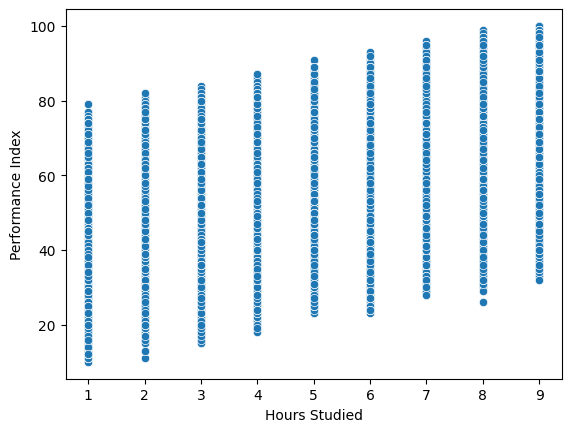

In [392]:
sns.scatterplot(df,x=df["Hours Studied"],y=df["Performance Index"])
plt.show()

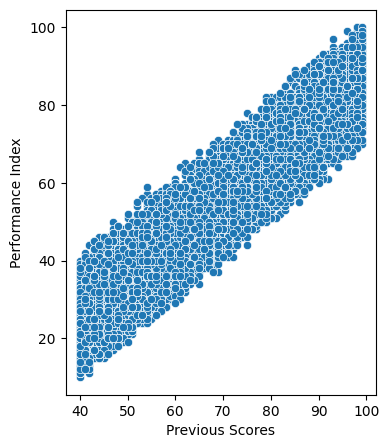

In [393]:
plt.figure(figsize=(4,5))
sns.scatterplot(df,x=df["Previous Scores"],y=df["Performance Index"])
plt.show()

In [394]:
# plt.figure(figsize=(4,5))
# sns.scatterplot(xtrain["Previous Scores"],predicted_values1)
# plt.show()

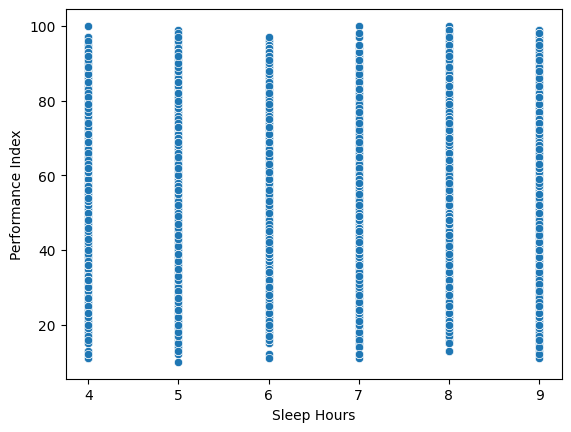

In [395]:
sns.scatterplot(df,x=df["Sleep Hours"],y=df["Performance Index"])
plt.show()

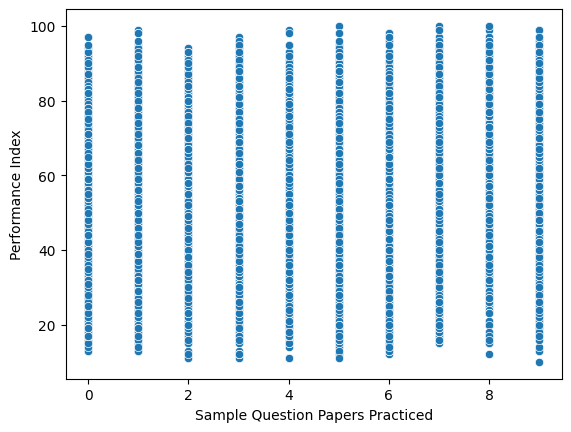

In [396]:
sns.scatterplot(df,x=df["Sample Question Papers Practiced"],y=df["Performance Index"])
plt.show()

Relationship between the columns
> Previous Score has Good relation with Performance Index      
0.8 - 1.0 = Very strong relationship   (80 - 100%)             
0.6 - 0.8 = Strong Linear relationship  (60 - 80%)     
0.4 - 0.6 = Moderate Linear relationship  (40 - 60%)      
0.2 - 0.4 = Weak Linear relationship   (20 - 40%)     
< 0.2 = Very waek or No relationship  (< 20%)      
0 = No Linear or NON LINEAR    (0%)  

Using Correlation

In [397]:
df.corr()['Performance Index']

Hours Studied                       0.373730
Previous Scores                     0.915189
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Performance Index                   1.000000
Name: Performance Index, dtype: float64

# MODEL EVALUATION

In [398]:
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error,mean_absolute_error

when we use metrics always - actual v/s predicted

In [399]:
#for r2_score always use actual - predicted value
r2_score(ytest,predicted_values)

0.9887144552384186

In [400]:
mean_squared_error(ytest,predicted_values) # avergae Squared Error

4.1822549145938135

In [401]:
rmse=root_mean_squared_error(ytest,predicted_values) # this will give actual average error
rmse
#or
# np.sqrt(mse)

2.0450562130645245

In [402]:
mean_absolute_error(ytest,predicted_values)  # average absolute error

1.6296726874197018

#MAE - when the dataset is to noisy / we have outliers the we use MEAN ABSOLUTE ERROR

In [403]:
MSE_evaluation= rmse / target_mean
MSE_evaluation

np.float64(0.03726550189628858)

MSE_EVALUATION = RMSE / TARGET_MEAN()             
<=0.10 = Perfect / very good model Performance / Low MSE    
0.10 - 0.2 = Average MSE      
0.3 = High MSE / More error / Bad Performance     

In [404]:
y_pred_train = model.predict(xtrain) # predicting on train data - using x values predicting y
y_pred_train

array([34.76901001, 25.38502005, 58.18029349, ..., 45.35527464,
       21.31136972, 22.8776303 ], shape=(8000,))

In [405]:
train_score = r2_score(ytrain,y_pred_train) #r2 is working 
train_score

0.9884388348325367

In [406]:
y_pred_test=model.predict(xtest) 
y_pred_test

array([55.00786377, 22.31444624, 47.59404705, ..., 16.48182916,
       63.64243731, 46.23799491], shape=(2000,))

In [407]:
test_score = r2_score(ytest,y_pred_test)
test_score

0.9887144552384186

GoodFit Because both Train and Test Score are nearest - 98%